In [63]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_boston # 보스턴 주택 가격 데이터

In [64]:
# 데이터 불러와서 살펴보기
data = load_boston()

In [65]:
data
# bunch 객체 : data, target, feature_names 등... 

{'data': array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.5300e+01, 3.9690e+02,
         4.9800e+00],
        [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9690e+02,
         9.1400e+00],
        [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9283e+02,
         4.0300e+00],
        ...,
        [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
         5.6400e+00],
        [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
         6.4800e+00],
        [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
         7.8800e+00]]),
 'target': array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
        18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
        15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
        13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
        21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
        35.4, 24.7, 3

In [66]:
# 키값들 확인
data.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename', 'data_module'])

In [67]:
# 데이터 정보 확인 
print(data.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [68]:
# 정보를 df화 시켜보기
# 문제 데이터만
boston_df = pd.DataFrame(data.data, columns = data.feature_names)
boston_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [69]:
# 정답데이터
house_price = data.target
house_price

array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
       18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
       15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
       13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
       21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
       35.4, 24.7, 31.6, 23.3, 19.6, 18.7, 16. , 22.2, 25. , 33. , 23.5,
       19.4, 22. , 17.4, 20.9, 24.2, 21.7, 22.8, 23.4, 24.1, 21.4, 20. ,
       20.8, 21.2, 20.3, 28. , 23.9, 24.8, 22.9, 23.9, 26.6, 22.5, 22.2,
       23.6, 28.7, 22.6, 22. , 22.9, 25. , 20.6, 28.4, 21.4, 38.7, 43.8,
       33.2, 27.5, 26.5, 18.6, 19.3, 20.1, 19.5, 19.5, 20.4, 19.8, 19.4,
       21.7, 22.8, 18.8, 18.7, 18.5, 18.3, 21.2, 19.2, 20.4, 19.3, 22. ,
       20.3, 20.5, 17.3, 18.8, 21.4, 15.7, 16.2, 18. , 14.3, 19.2, 19.6,
       23. , 18.4, 15.6, 18.1, 17.4, 17.1, 13.3, 17.8, 14. , 14.4, 13.4,
       15.6, 11.8, 13.8, 15.6, 14.6, 17.8, 15.4, 21

훈련데이터와 테스트데이터 분리

In [70]:
from sklearn.model_selection import train_test_split

In [71]:
X_train,X_test,y_train,y_test = train_test_split(boston_df,house_price, 
                                                test_size = 0.3, random_state = 0)

In [72]:
# 데이터 크기 확인
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(354, 13) (354,)
(152, 13) (152,)


#### LinearRegression


In [73]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score

In [74]:
# 객체 생성
linear_model = LinearRegression()

In [75]:
# 모델 학습
linear_model.fit(X_train,y_train)

LinearRegression()

In [76]:
# 일반화 성능 정도는 어떻게 될까?
result = cross_val_score(linear_model, X_train,y_train, cv = 5)
print(result)
print(result.mean())

[0.7246982  0.58082515 0.77515092 0.72161474 0.78935797]
0.718329397431592


In [77]:
# score
linear_model.score(X_test,y_test) 
# R- Squared 성능평가 , 1에가까울수록 성능 좋음

0.6733825506400193

In [78]:
# train score
linear_model.score(X_train,y_train) # 학습이 잘 되지 않은듯함

0.7645451026942549

현재 선형모델은 과소적합일 확률이 높음  
모델의 성능을 개선하기 위해 노력을 해봐야함  
성능 개선 : 훈련 데이터가 많아질수록 성능이 좋아질 수 있음 (특성 확장)

#### 특성 확장
데이터를 더 많이 늘려서 모델의 성능을 높여보자! 

In [79]:
boston_copy = X_train.copy() # 복사

In [80]:
# 상관관계 corr()
# 주택가격과 특성데이터 간의 상관관계
boston_copy['PRICE'] = y_train
boston_copy.corr()['PRICE'].abs().sort_values(ascending = False)
# 상관계수 : -1 ,1에 가까울수록 상관이 있음, 0에가까울수록 상관이 없음

PRICE      1.000000
LSTAT      0.743289
RM         0.708978
PTRATIO    0.564733
INDUS      0.504361
TAX        0.481319
NOX        0.426690
AGE        0.390942
RAD        0.389533
CRIM       0.388182
ZN         0.386115
B          0.324437
DIS        0.245634
CHAS       0.162395
Name: PRICE, dtype: float64

In [81]:
print(data.DESCR)
# price와 상관이 높은 특성은 LSTAT 확인
# - LSTAT    % lower status of the population 

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

- 상관 관계가 높은 LSTAT 특성 확장 진행해보기

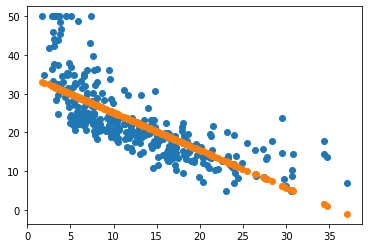

In [82]:
# 확장전 
model = LinearRegression()
model.fit(X_train[['LSTAT']], y_train)
pre = model.predict(X_train[['LSTAT']])

plt.scatter(X_train['LSTAT'], y_train)
plt.scatter(X_train['LSTAT'], pre)
plt.show()

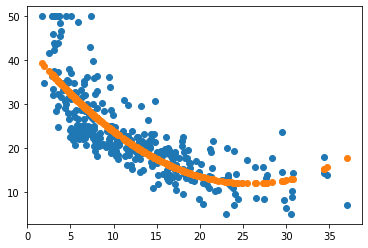

In [83]:
# 확장후
X_train['LSTAT * LSTAT'] = X_train['LSTAT'] *  X_train['LSTAT']
model = LinearRegression()
model.fit(X_train[['LSTAT','LSTAT * LSTAT']], y_train)
pre2 = model.predict(X_train[['LSTAT','LSTAT * LSTAT']])
pre2

plt.scatter(X_train['LSTAT'], y_train)
plt.scatter(X_train['LSTAT'], pre2)
plt.show()

In [84]:
# 특성확장된 데이터를 활용하여 모델 학습
# 성능 확인해보자
X_test['LSTAT * LSTAT'] = X_test['LSTAT'] * X_test['LSTAT']

model = LinearRegression()
model.fit(X_train,y_train)
model.score(X_test,y_test) # 0.697

0.6978697736472479

다항회귀 이해: 독립변수의 단항식이 아닌 2차, 3차 방정식과 같은 다항식으로 표현된 것을 다항회귀함
  
주의)  
1. 다항회귀를 선형이 아닌 비선형 회귀로 혼동할 수 있지만, 선형회귀임을 기억하자
2. 선형/비선형을 나누는 기준은 회귀 계수가 선형/비선형인지에 따라 것임

- RM 특성 확장해보기

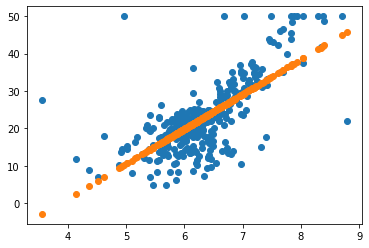

In [85]:
# 확장전
model = LinearRegression()
model.fit(X_train[['RM']], y_train)
pre = model.predict(X_train[['RM']])

plt.scatter(X_train['RM'],y_train)
plt.scatter(X_train['RM'],pre)
plt.show()

In [86]:
import warnings
warnings.filterwarnings(action = 'ignore')

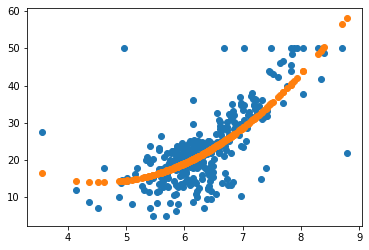

In [87]:
# 확장후
X_train['RM * RM'] = X_train['RM'] * X_train['RM']

model = LinearRegression()
model.fit(X_train[['RM','RM * RM']], y_train)
pre2 = model.predict(X_train[['RM','RM * RM']])

plt.scatter(X_train['RM'], y_train)
plt.scatter(X_train['RM'], pre2)
plt.show()

In [88]:
X_test['RM * RM'] = X_test['RM'] * X_test['RM']

# 특성 확장 후 전체 데이터 이용하여 모델 학습
# 모델 성능 평가
model = LinearRegression()
model.fit(X_train, y_train)
model.score(X_test,y_test) # 75%

0.7460776611187947

--------------------------------------------------------------------------------------------------------------------------

### 추가) 보스턴 주택 가격 데이터 활용 LinearRegression예측실습
실습에서 2개의 개별 특성을 가지고 특성곱을 실행했다.  
또 다른 특성으로 특성곱을 실행하여 모델의 정확도를 높여보면서 선형회귀 모델을 학습하고 이해해보자.

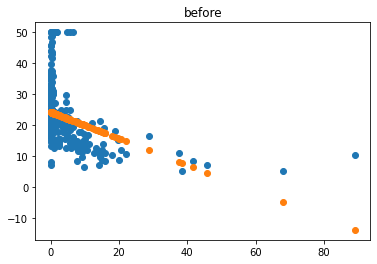

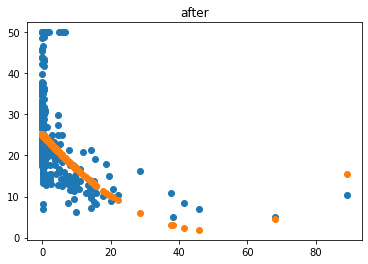

0.7462540003712625

In [89]:
# 확장전
model = LinearRegression()
model.fit(X_train[['CRIM']], y_train)
pre = model.predict(X_train[['CRIM']])

plt.scatter(X_train['CRIM'],y_train)
plt.scatter(X_train['CRIM'],pre)
plt.title('before')
plt.show()

# 확장후
X_train['CRIM * CRIM'] = X_train['CRIM'] * X_train['CRIM']

model = LinearRegression()
model.fit(X_train[['CRIM','CRIM * CRIM']], y_train)
pre2 = model.predict(X_train[['CRIM','CRIM * CRIM']])

plt.scatter(X_train['CRIM'], y_train)
plt.scatter(X_train['CRIM'], pre2)
plt.title('after')
plt.show()

X_test['CRIM * CRIM'] = X_test['CRIM'] * X_test['CRIM']

# 특성 확장 후 전체 데이터 이용하여 모델 학습
# 모델 성능 평가
model = LinearRegression()
model.fit(X_train, y_train)
model.score(X_test,y_test) # 0.7462%

In [ ]:
# 다른 특성을 가지고 특성곱 해보면서 모델 학습에 어느정도 영향을 주는지 파악해보면 될 것 같습니다 ~ 

--------------------------------------------------------------------------------------------------------------------------

--------------------------------------------------------------------------------------------------------------------------

- 모든 특성을 확장해보자

In [ ]:
extended_X_train = X_train.copy()
for col1 in X_train.columns:
    for col2 in X_train.columns:
        extended_X_train[col1 +' * '+ col2 ] = X_train[col1] * X_train[col2]

In [ ]:
extended_X_test = X_test.copy()
for col1 in X_test.columns:
    for col2 in X_test.columns:
        extended_X_test[col1 +' * '+ col2 ] = X_test[col1] * X_test[col2]

In [ ]:
print(extended_X_train.shape)
print(extended_X_test.shape)

In [ ]:
# 전체 특성 확장된 데이터를 모델 학습
# 성능 평가
model = LinearRegression()
model.fit(extended_X_train,y_train)
model.score(extended_X_test,y_test)

특성이 너무 많아져서 과대적합이 걸려 전보다 낮은 테스트 스코어를 볼 수 있음  
이는 과대적합이 되었을 확률이 높으므로 모델의 정규화를 한번 가해보자

#### Ridge

In [ ]:
from sklearn.linear_model import Ridge

In [ ]:
# 객체 생성
ridge_model = Ridge(alpha=1000) # 정규화 파라미터

In [ ]:
# 모델 학습
ridge_model.fit(extended_X_train,y_train)

In [ ]:
# 모델 성능
# 회귀 모델 - R Squared
# 1에 가까울수록 성능 좋음
ridge_model.score(extended_X_test,y_test)

### Ridge와 Lasso 비교

In [ ]:
from sklearn.linear_model import Lasso

In [ ]:
alpha_lst = [0.001,0.01,0.1,10,100,1000]
ridge_coef_lst = []
lasso_coef_lst = []

for a in alpha_lst:
    r_model = Ridge(alpha = a)
    l_model = Lasso(alpha = a)
    r_model.fit(X_train, y_train)
    l_model.fit(X_train, y_train)
    ridge_coef_lst.append(r_model.coef_)
    lasso_coef_lst.append(l_model.coef_)

In [ ]:
# df 화
lasso_df = pd.DataFrame(np.array(lasso_coef_lst).T, columns = alpha_lst)
lasso_df

In [ ]:
# df
ridge_df = pd.DataFrame(np.array(ridge_coef_lst).T, columns = alpha_lst)
ridge_df